# DVS RF "Tracking Stability" Test
Based on work originally started for SKA Dish QTP 11/2021

Initial approach was to first measure pointing offset, then let the antenna track at the last offset position. Done with a reference antenna tracking the target on bore sight, so that the ratios of auto correlation data gives the relative gain of the antenna under test, largely free from atmospheric disturbance. Then compare the statistics of the time series of intensity fluctuations to the expected distribution of gain fluctuations of the target, given the pointing error plus offset.

This approach was halted because of difficulties with the analysis (not robust to assume 2D distribution of pointing offsets, error bars of ~100%). A more robust approach was selected: continuous circular scans while tracking.

For more information, contact [Adriaan Peens-Hough](aph@sarao.ac.za)

                                                                                        As on 30/10/2024

In [1]:
%matplotlib inline

import pylab as plt
import numpy as np

In [2]:
from dvs import tracking, util
from analysis import katselib

/home/aph/work/dvs/libraries/analysis/katsemodels.py:1157: RuntimeWarning: divide by zero encountered in divide
  I_therm = lambda p, f_MHz: p[0] * (f_MHz/p[1])**2 * (1 - np.exp(-(f_MHz/p[1])**-2)) # The radiation intensity of a nebula in thermal equilibruim... Opacity tau(f)=(f/p[1])^2 fits the data.
/home/aph/work/dvs/libraries/analysis/katsemodels.py:1157: RuntimeWarning: invalid value encountered in multiply
  I_therm = lambda p, f_MHz: p[0] * (f_MHz/p[1])**2 * (1 - np.exp(-(f_MHz/p[1])**-2)) # The radiation intensity of a nebula in thermal equilibruim... Opacity tau(f)=(f/p[1])^2 fits the data.


## Measurement Patterns

DVS observation script: circular_pointing.py

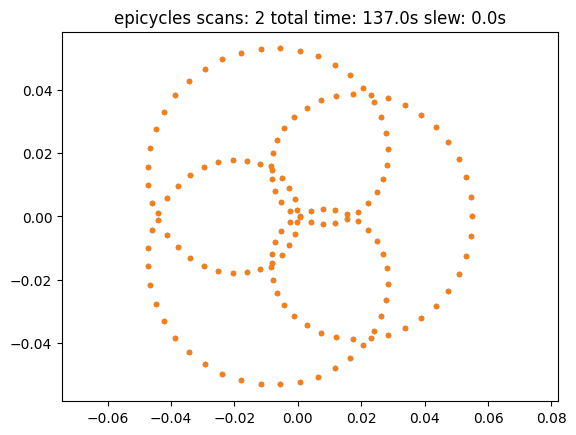

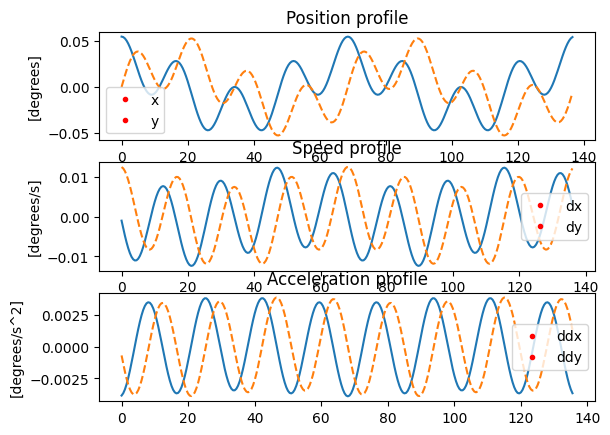

<Figure size 640x480 with 0 Axes>

In [3]:
# Only the first cycle is displayed by the following
%run ../observations/circular_pointing.py --kind epicycles --prepopulatetime 30 --sampletime 0.5 --scanspeed 0.005 --scan-ants s0000 --cycle-tracktime 0 --scan-extent 0.11 --cycle-duration 160 'INTELSAT 22'

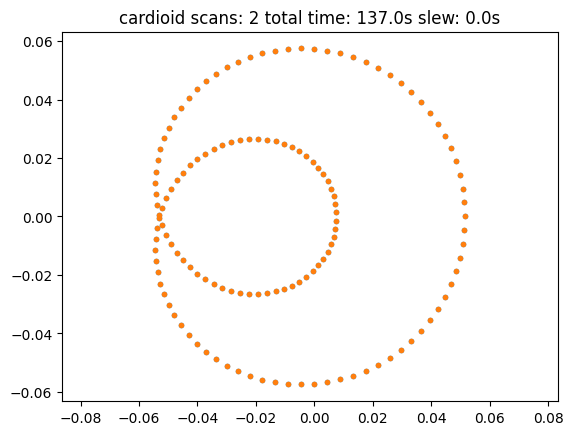

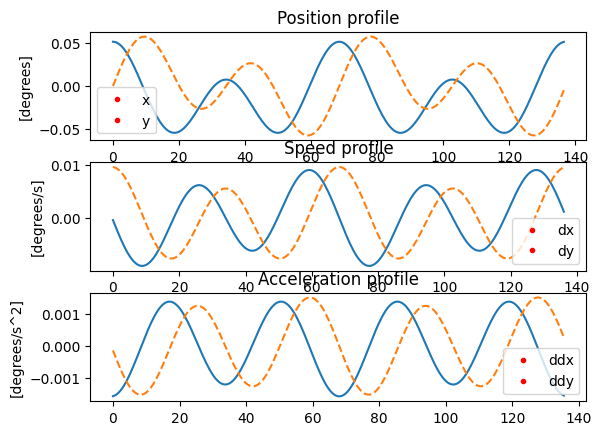

<Figure size 640x480 with 0 Axes>

In [4]:
# Only the first cycle is displayed by the following
%run ../observations/circular_pointing.py --kind cardioid --prepopulatetime 30 --sampletime 0.5 --scanspeed 0.005 --scan-ants s0000 --cycle-tracktime 0 --scan-extent 0.11 --cycle-duration 160 'INTELSAT 22'

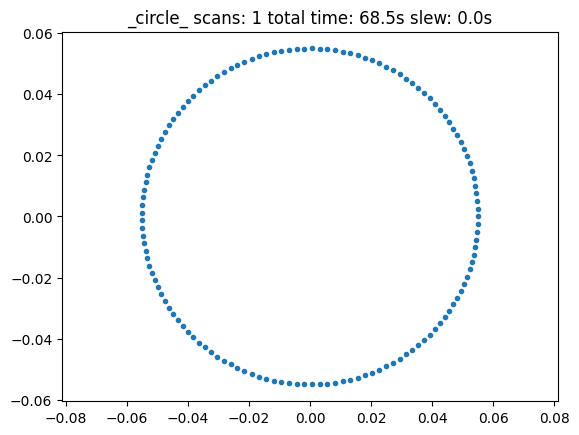

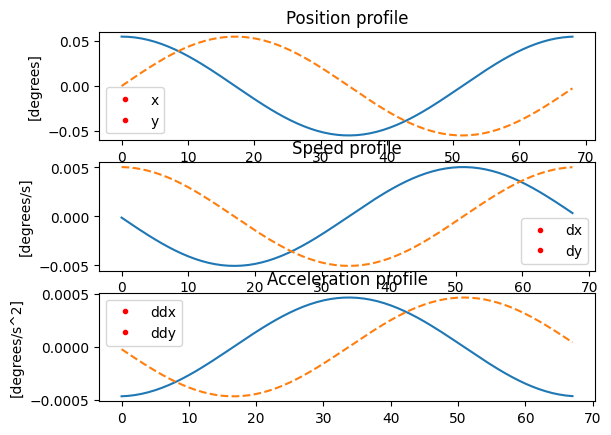

<Figure size 640x480 with 0 Axes>

In [5]:
# Only the first cycle is displayed by the following
%run ../observations/circular_pointing.py --kind _circle_ --prepopulatetime 30 --sampletime 0.5 --scanspeed 0.005 --scan-ants s0000 --cycle-tracktime 0 --scan-extent 0.11 --cycle-duration 60 --num-cycles 30 'INTELSAT 22'

## Simulations

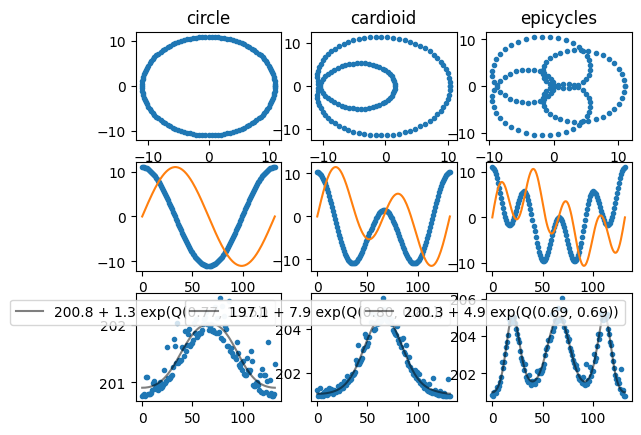

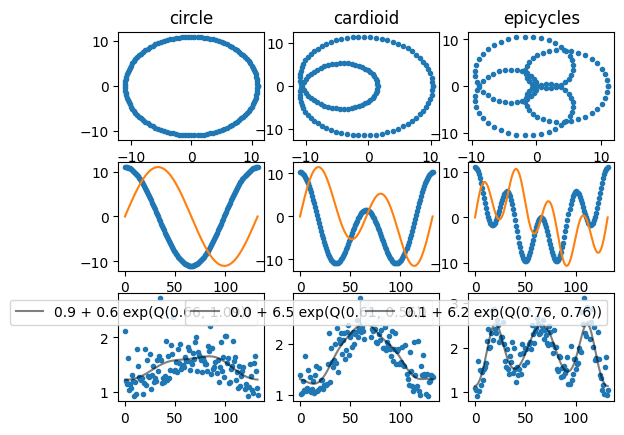

In [6]:
# Demonstrate the fits for single dish & interferometric measurements, with different scan patterns
tracking._demo_fit_gaussianoffset_(ampl=5, SEFD=200, cycles=1)

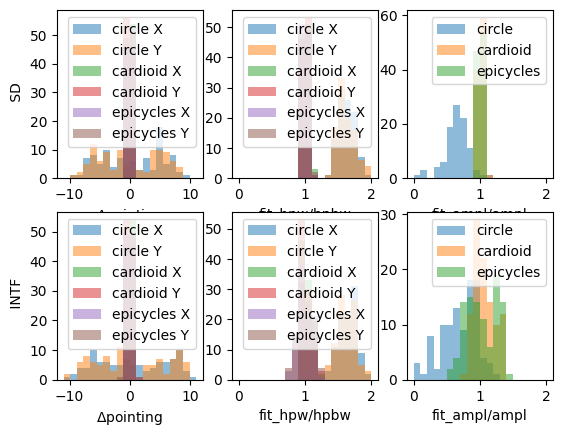

In [7]:
# Demonstrate the fits for single dish & interferometric measurements, with different scan patterns
tracking._demo_fit_gaussianoffset_(ampl=5, SEFD=200, cycles=100)

In [8]:
# Demonstrate a simulated "single dish" dataset similar to what's expected with DVS Ku-band
tracking._demo_reduce_circular_pointing_(freq=11e9, ampl=5, SEFD=200, kind="epicycles")

Simulated xy offsets 0 0 [arcsec]
[0] Fit: True	 xy offsets -1.11413, -0.410969, AzEl offsets -1.27913, -0.410971 [arcsec]
[0] Fit: True	 xy offsets -1.36696, 0.492478, AzEl offsets -1.57344, 0.492475 [arcsec]
[0] Fit: True	 xy offsets 1.67306, 2.34558, AzEl offsets 1.93076, 2.34558 [arcsec]
[0] Fit: True	 xy offsets 1.78096, -0.221245, AzEl offsets 2.06061, -0.22125 [arcsec]
[0] Fit: True	 xy offsets 0.497186, 0.187498, AzEl offsets 0.576755, 0.187498 [arcsec]
[0] Fit: True	 xy offsets 0.33602, -0.109713, AzEl offsets 0.390817, -0.109713 [arcsec]
[0] Fit: True	 xy offsets 1.36001, 1.07524, AzEl offsets 1.58596, 1.07524 [arcsec]
Std [arcsec] 1.3700302995181652 0.890726559174774
Simulated xy offsets 152.4054395590447 0 [arcsec]
[0] Fit: True	 xy offsets 150.706, 0.583409, AzEl offsets 173.025, 0.552356 [arcsec]
[0] Fit: True	 xy offsets 150.415, -0.157537, AzEl offsets 173.135, -0.188799 [arcsec]
[0] Fit: True	 xy offsets 153.778, -1.28945, AzEl offsets 177.463, -1.32247 [arcsec]
[0] Fi

## Proof of Concept - Measured Data


In [9]:
rr = katselib.ls_archive("Antennas:*s0000* AND ExperimentID:[2021030 TO 20211230] AND InstructionSet:*circular_pointing* AND Description:Ku AND Pointing",
                           min_duration=1000, vis_status=True, fields=["CaptureBlockId", "ExperimentID","Description","CenterFrequency","InstructionSet"], field_len=220)

ARCHIVED1636615607 	20211111-0003 	SDQM: Ku-band Circular Pointing 	12499291015.62 	/home/kat/usersnfs/aph/circular_pointing.py --prepopulatetime 30 --scan-ants s0000,m028 --kind _circle_ --scan-extent 0.11 --scanspeed=0.1 --tracktime 0 --cycle-duration 100 --num-cycles 1 /home/kat/usersnfs/aph/targets_
ARCHIVED1636625868 	20211111-0008 	SDQM: Ku-band Circular Pointing 	12499291015.62 	/home/kat/usersnfs/aph/circular_pointing.py --prepopulatetime 30 --scan-ants s0000,m028 --kind _circle_ --scan-extent 0.11 --scanspeed=0.005 --tracktime 0 --cycle-tracktime 10 --cycle-duration 100 --num-cycles 1 --max-du
ARCHIVED1636648221 	20211111-0010 	SDQM: Ku-band Circular Pointing 	12499291015.62 	/home/kat/usersnfs/aph/circular_pointing.py --prepopulatetime 30 --scan-ants s0000,m028 --kind _circle_ --scan-extent 0.11 --scanspeed=0.005 --tracktime 0 --cycle-tracktime 10 --cycle-duration 100 --num-cycles 1 --max-du
ARCHIVED1636654665 	20211111-0012 	SDQM: Ku-band Circular Pointing 	12499291015.62 	/

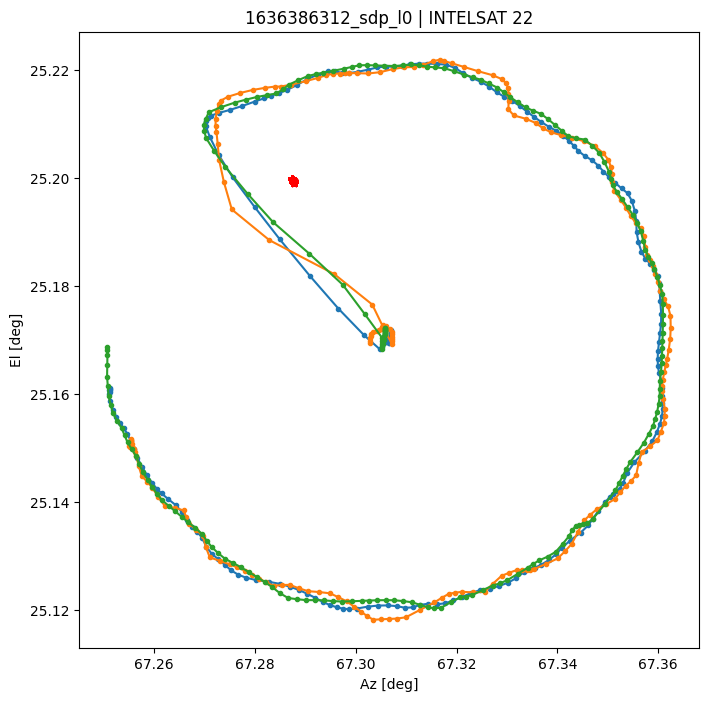

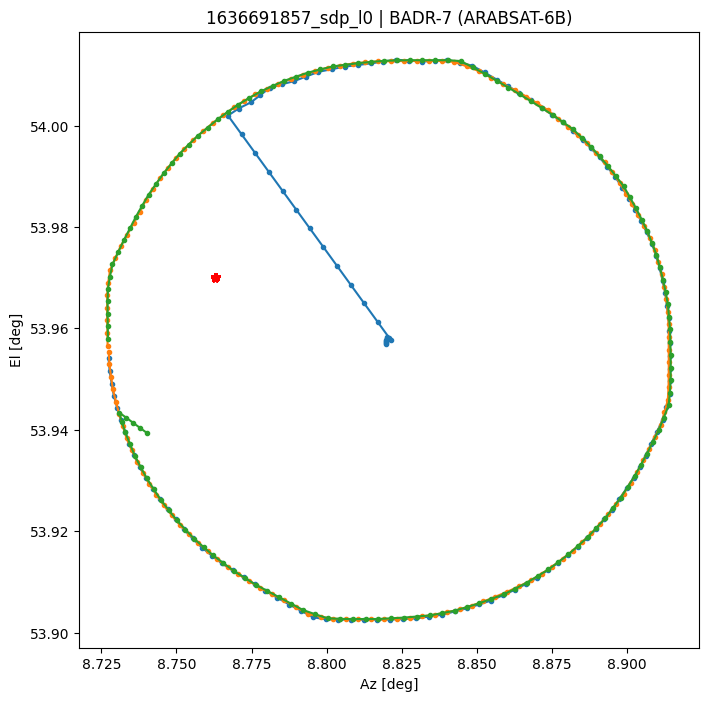

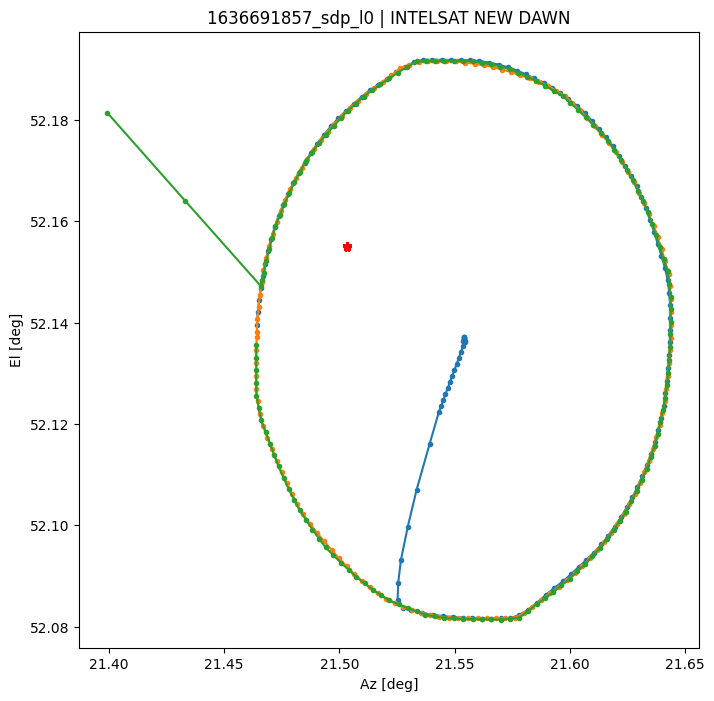

In [10]:
# Confirm scan patterns are correct with activity time_offset
for fid in [1636386312, 1636691857]:
    ds = util.open_dataset(fid)
    ds.select(scans="track", compscans="~slew") # Ignore slew & stop to identify the target
    katselib.plot_pointing(ds, ants=["s0000"], scans="track", compscans=range(10))

In [11]:
cachedfn = lambda cbid: f"./l1_data/{cbid}/{cbid}_sdp_l0.full.rdb"

# Target channel maps for GEOS beacons
CHANS = {11.696:{"INTELSAT NEW DAWN":[881,882],
                 "BADR-7 (ARABSAT-6B)":[2083,2085]},
         12.4995:{"INTELSAT 22":[2063]} # Should be 12.499GHz->2047; but in some datasets it jumps to 2063 (12.502GHz = IS-17 & IS-18)!?? Seems like 3arcmin position difference too, so maybe an adjacent satellite?
    }
chans = lambda target_name, fGHz: CHANS[fGHz].get(target_name, slice(10,-10)) # If not in CHANS, then continuum: drop edge channels

[2] Fit: True	 xy offsets -81.6157, 168.34, AzEl offsets -90.2129, 168.333 [arcsec]
[5] Fit: True	 xy offsets -94.3838, 169.866, AzEl offsets -104.327, 169.856 [arcsec]
[8] Fit: True	 xy offsets -64.8101, 157.51, AzEl offsets -71.6355, 157.505 [arcsec]
[11] Fit: True	 xy offsets -65.4936, 139.546, AzEl offsets -72.3882, 139.541 [arcsec]
[14] Fit: True	 xy offsets -75.9593, 177.491, AzEl offsets -83.9631, 177.485 [arcsec]
[17] Fit: True	 xy offsets -52.8047, 135.1, AzEl offsets -58.3632, 135.097 [arcsec]
[20] Fit: False	 xy offsets 2.10424, -4.91999, AzEl offsets 2.325, -4.91999 [arcsec]
[23] Fit: False	 xy offsets 64.016, 10.0352, AzEl offsets 70.7347, 10.0305 [arcsec]
Std [arcsec] 14.763202868807701 15.77178607138443


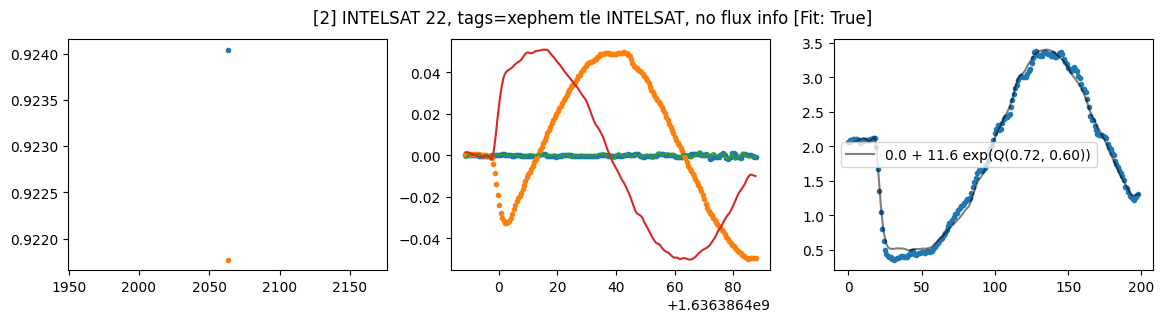

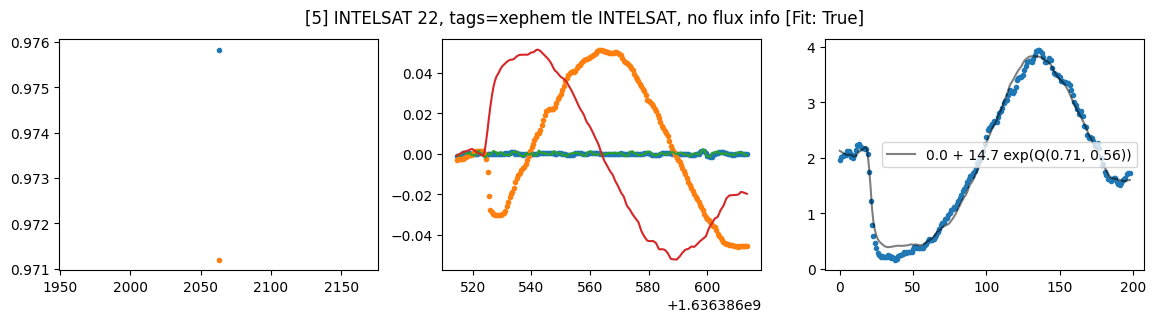

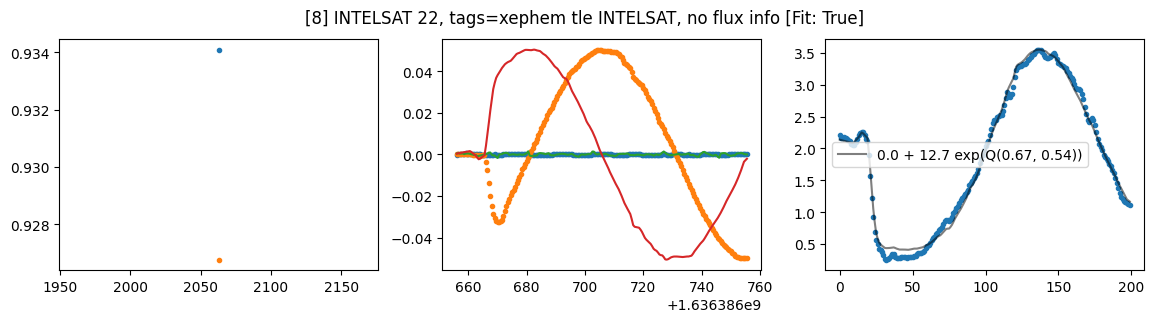

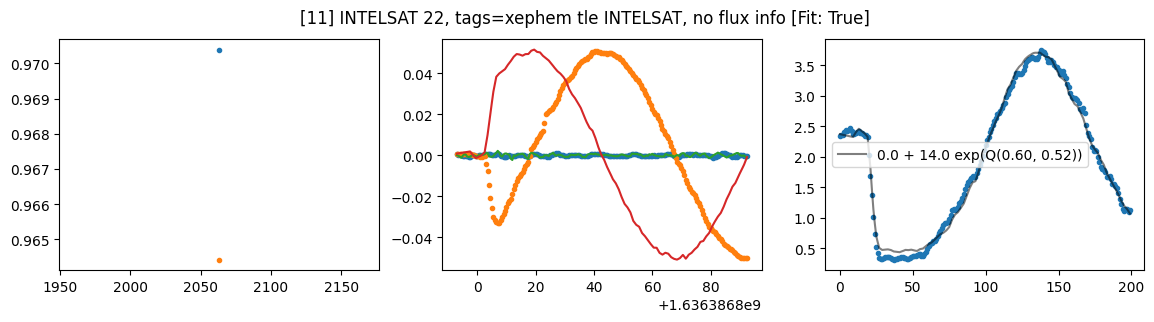

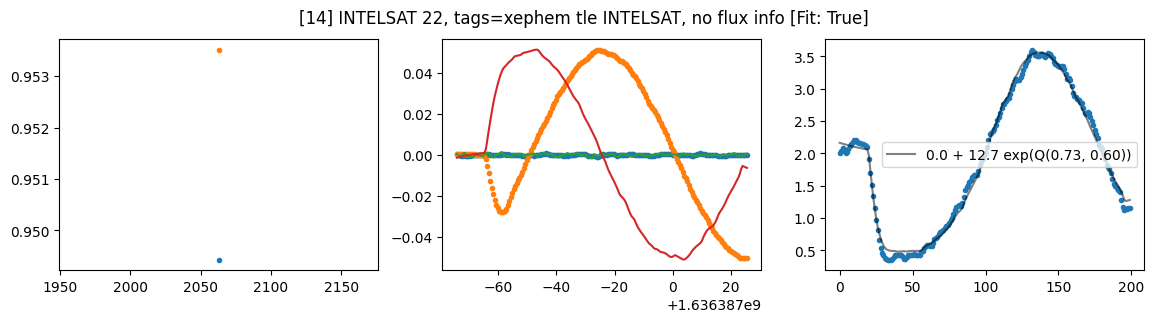

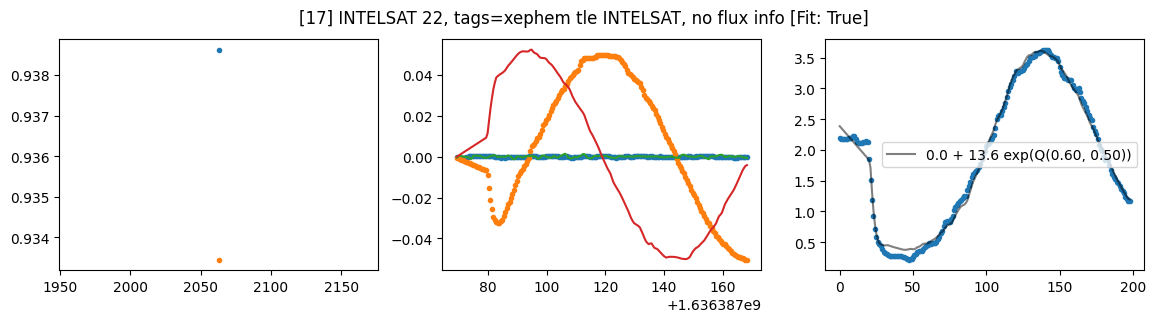

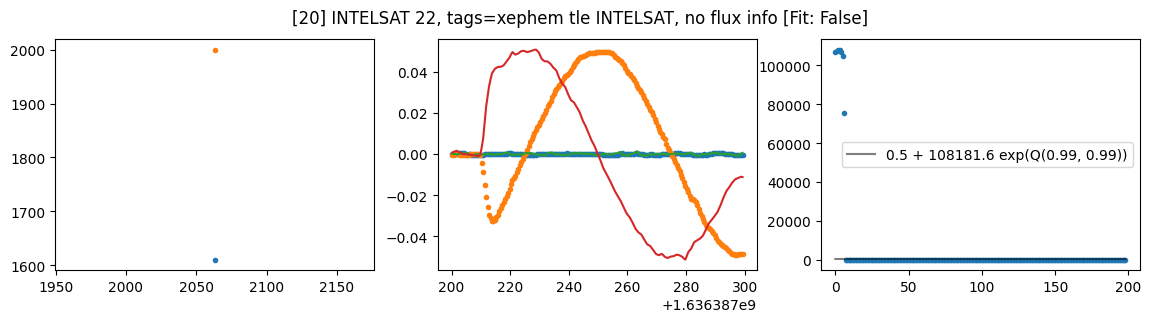

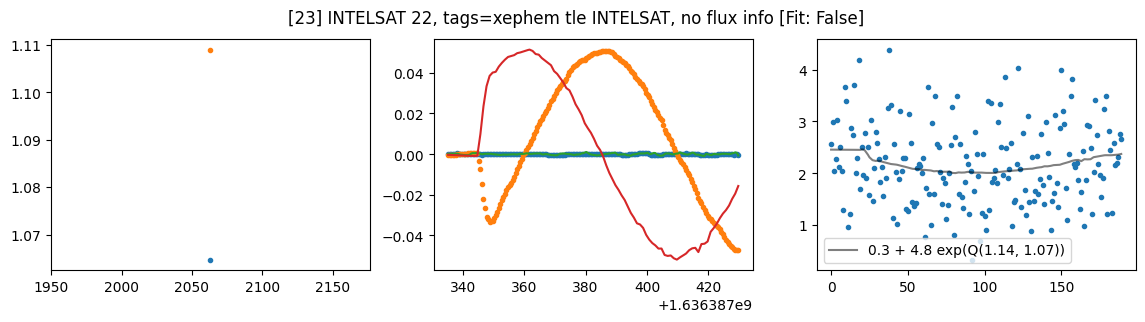

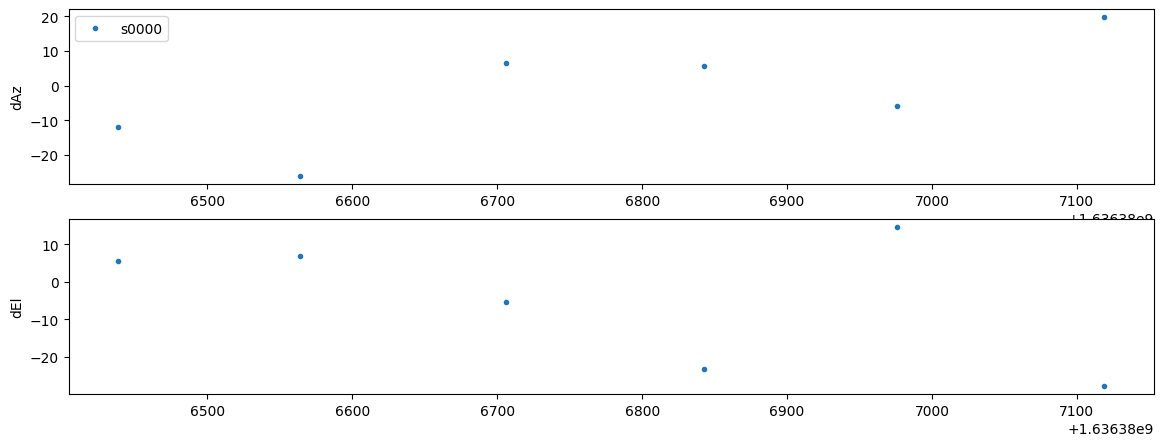

In [12]:
# Interferometric on IS-22 (the beacon disappeared in the last two cycles???)
s_offsets_intf = tracking.analyse_circ_scans(util.open_dataset(cachedfn(1636386312)), ["s0000"], chans, track_ant="m028", debug=True)

[2] Fit: True	 xy offsets -81.6192, 187.538, AzEl offsets -90.2207, 187.531 [arcsec]
[5] Fit: True	 xy offsets -104.375, 205.208, AzEl offsets -115.38, 205.195 [arcsec]
[8] Fit: True	 xy offsets -64.4777, 182.599, AzEl offsets -71.2722, 182.594 [arcsec]
[11] Fit: True	 xy offsets -70.8659, 158.615, AzEl offsets -78.3294, 158.609 [arcsec]
[14] Fit: True	 xy offsets -73.2806, 206.296, AzEl offsets -81.0074, 206.29 [arcsec]
[17] Fit: True	 xy offsets -52.851, 144.185, AzEl offsets -58.4155, 144.181 [arcsec]
[20] Fit: False	 xy offsets 4.29459, -3.41779, AzEl offsets 4.74517, -3.41781 [arcsec]
[23] Fit: False	 xy offsets -67.2796, 361.318, AzEl offsets -74.4005, 361.313 [arcsec]
Std [arcsec] 17.63718754060299 22.828127181853777


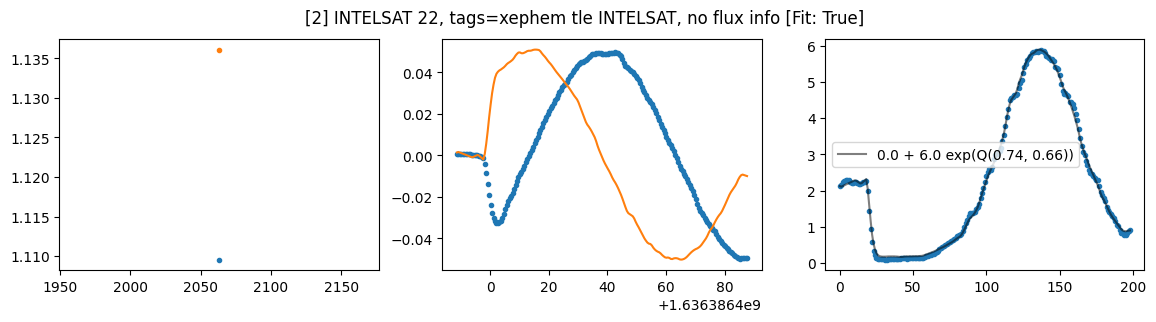

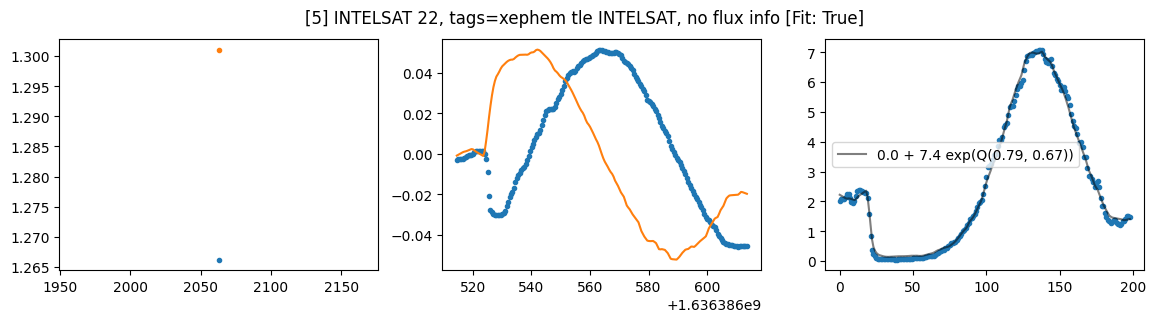

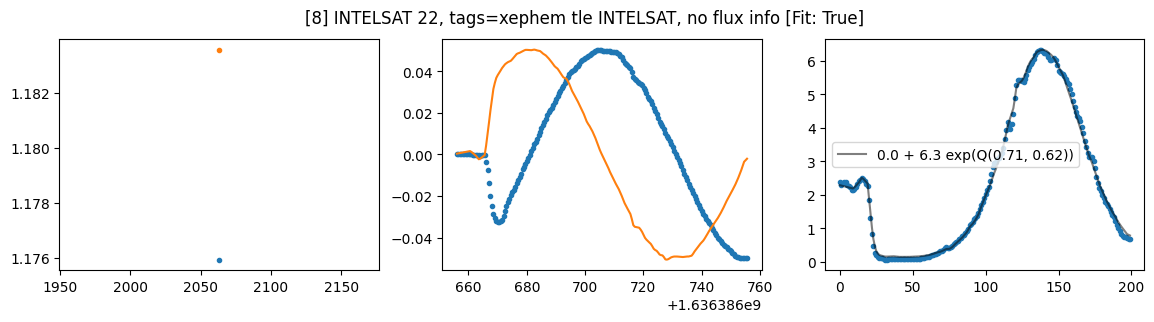

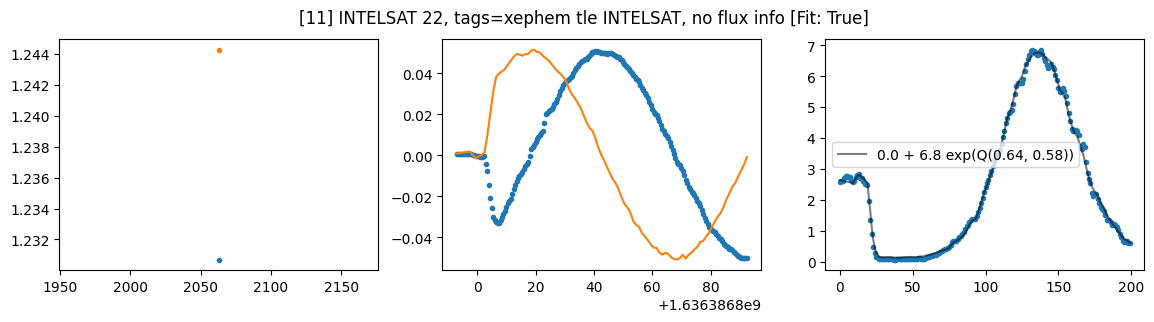

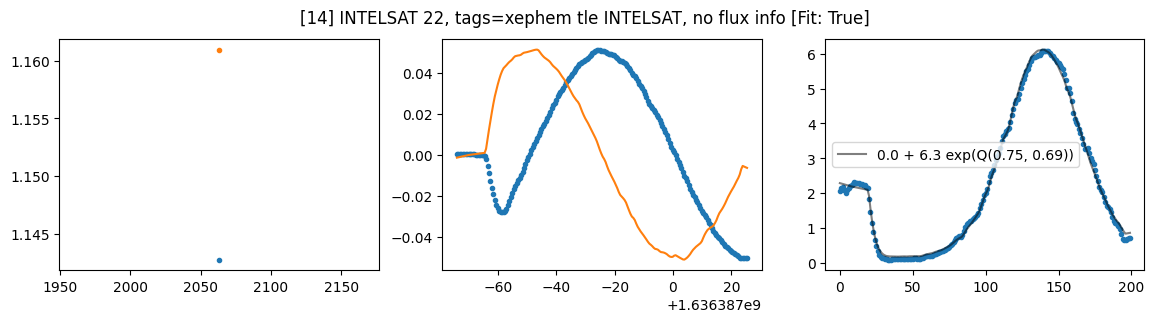

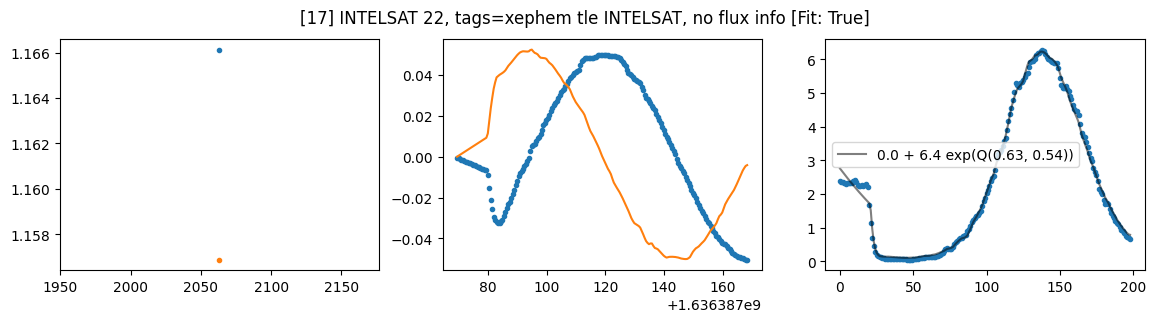

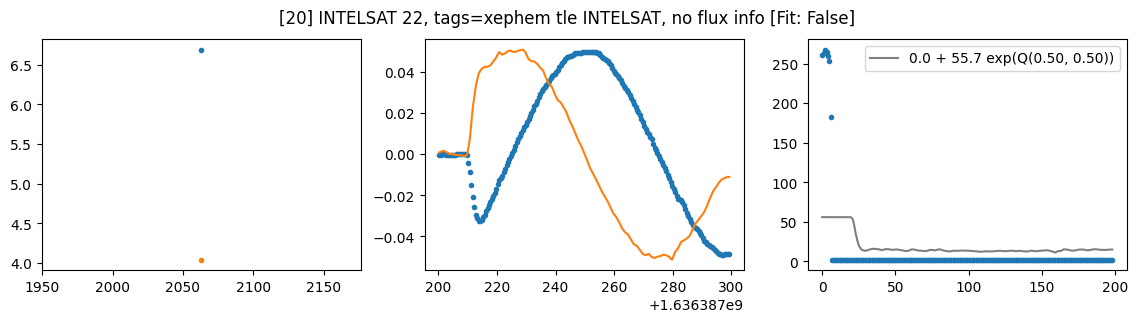

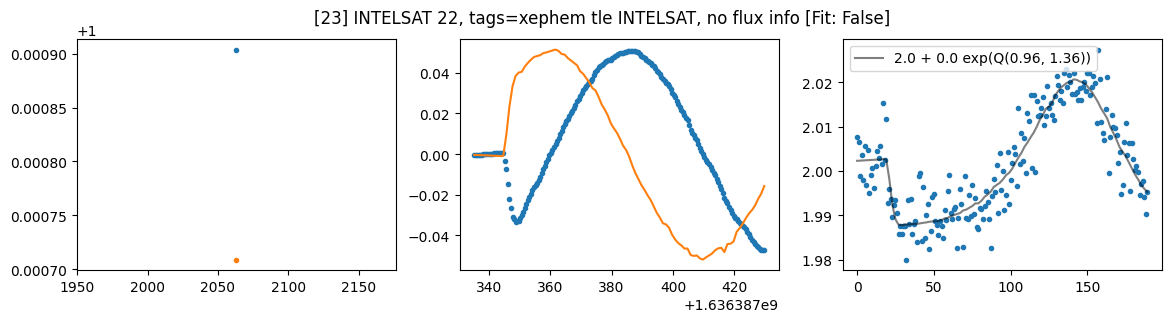

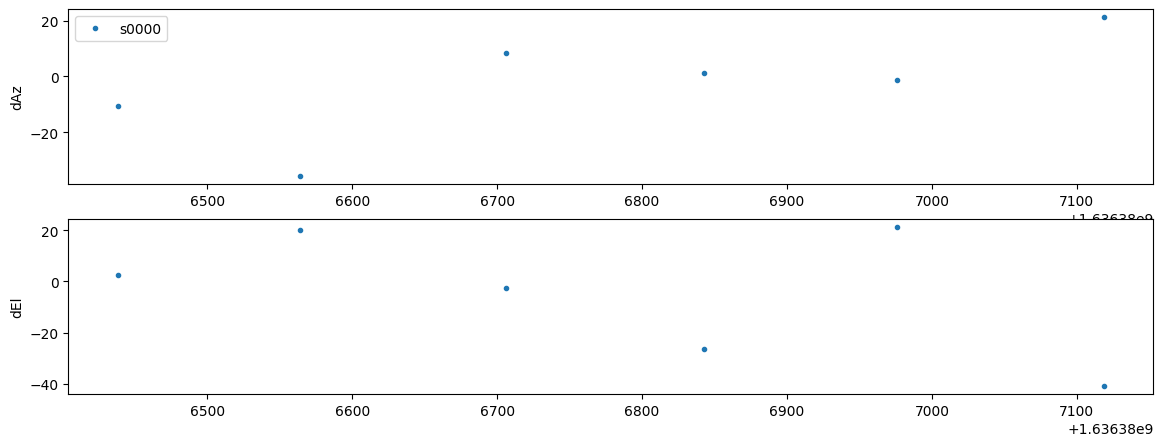

In [13]:
# Same dataset as above, now processed as "single dish" data
s_offsets_sd = tracking.analyse_circ_scans(util.open_dataset(cachedfn(1636386312)), ["s0000"], chans, output_filepattern="track%s.csv", debug=True)

[2] Fit: True	 xy offsets 0.527088, 12.3884, AzEl offsets 0.859158, 12.3884 [arcsec]
[3] Fit: False	 xy offsets 1.04907, 16.0556, AzEl offsets 1.71003, 16.0555 [arcsec]
[4] Fit: True	 xy offsets 1.22971, 13.8833, AzEl offsets 2.00445, 13.8833 [arcsec]
[7] Fit: True	 xy offsets 14.1235, 25.1859, AzEl offsets 24.0145, 25.1852 [arcsec]
[8] Fit: True	 xy offsets 11.7425, 21.576, AzEl offsets 19.9655, 21.5755 [arcsec]
[9] Fit: True	 xy offsets 12.9837, 24.7276, AzEl offsets 22.0765, 24.727 [arcsec]
[12] Fit: True	 xy offsets 0.139019, 12.0725, AzEl offsets 0.226599, 12.0725 [arcsec]
[13] Fit: False	 xy offsets -0.31052, 14.6161, AzEl offsets -0.50615, 14.6161 [arcsec]
[14] Fit: True	 xy offsets -0.563274, 14.9084, AzEl offsets -0.918138, 14.9084 [arcsec]
[17] Fit: True	 xy offsets 12.7462, 26.3532, AzEl offsets 21.6732, 26.3527 [arcsec]
[18] Fit: True	 xy offsets 13.2446, 25.6362, AzEl offsets 22.5207, 25.6356 [arcsec]
[19] Fit: True	 xy offsets 8.20577, 16.5419, AzEl offsets 13.9519, 16.54

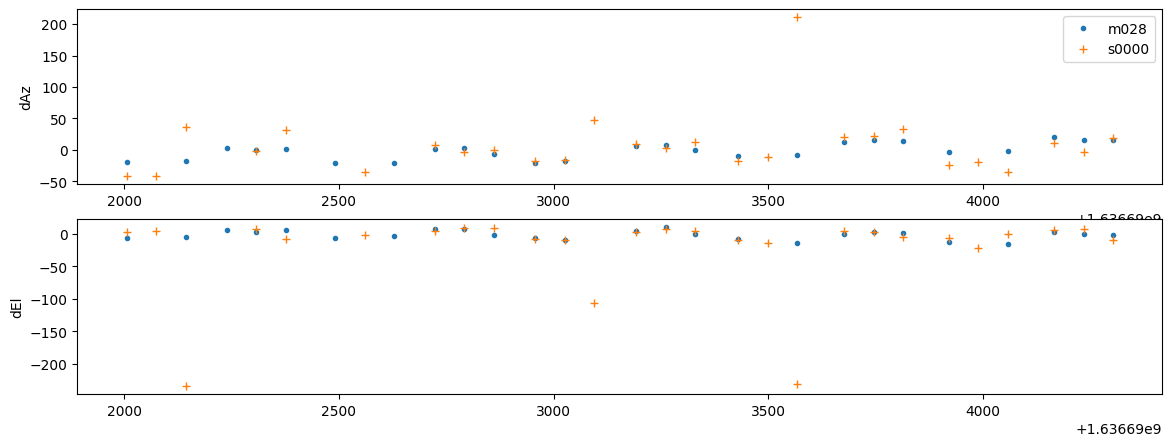

In [14]:
# "Single dish" alternating on two different GEOS targets
tracking.analyse_circ_scans(util.open_dataset(cachedfn(1636691857)), ["m028","s0000"], chans, debug=False);